# Estimation of distribution
we are going to work with two kind of estimations:
* Parametric estimation
* Non-parametric estimation

In [ ]:
import numpy as np
from matplotlib import pyplot
from numpy.random import normal         #generator of numbers in normal distribution
from scipy.stats import norm            #normal distribution

We are going to generate random data with normal distribution, and use this as base for the estimation exercise.

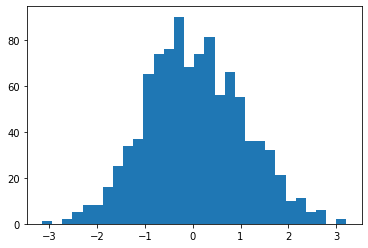

In [ ]:
sample = normal(size= 1000)  # generate data in with normal distribution
pyplot.hist(sample, bins = 30)
pyplot.show()

# Parametric estimation

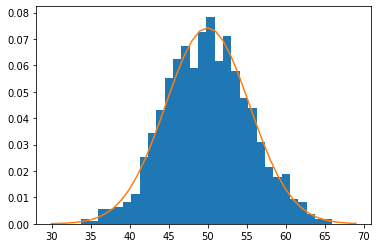

In [ ]:
sample = normal(loc =50,scale=5,size=1000)     #loc=mu=mean=50 and scale=sigma=sd=5   we create a normal distribution
mu = sample.mean()                             #we calculate the mean from the sample
sigma = sample.std()                           #now we calculate the standar desviation

dist =norm(mu,sigma)                           #and create a normal distribution only from the parameters mu and sigma
values = [value for value in range (30,70)]     #create the values
probability = [dist.pdf(value) for value in values]    #we put the values in the norm distribution

pyplot.hist(sample, bins=30, density = True)        #graph experimental results
pyplot.plot(values, probability)                    #graph theorical values

# Non-parametric estimation

we use scikit learn: smoothing parameter and base function

1. we create a bimodal distribution, this are theorical adjustment.

In [ ]:
from numpy import hstack            #works to join many arrange
from sklearn.neighbors import KernelDensity

sample1 = normal(loc=20, scale=5, size=300)           #first distribution
sample2 = normal(loc=40, scale=5, size=700)           #seconf distribution
sample = hstack((sample1,sample2))                    #join data in one

model = KernelDensity(bandwidth=2, kernel='gaussian')   #we create the model with the kernal specifying the distribution we want to adjust
sample = sample.reshape((len(sample), 1))               #technism to fit the data structure
model.fit(sample)

KernelDensity(bandwidth=2)

2. Now to compare experimental data with theorical data 

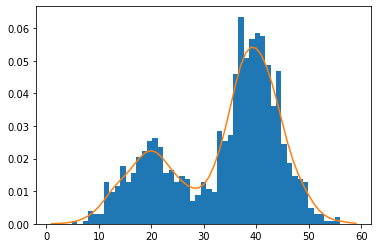

In [ ]:
values = np.asarray([value for value in range (1,60)])     #create the values
values = values.reshape((len(values), 1))                  

probabilities = model.score_samples(values)                #calculate logaritmic probabilities because its computational better
probabilities = np.exp(probabilities)                      #calculate the inversion of probabolities, to have the real probabilities

pyplot.hist(sample, bins = 50, density = True)             #graph experimental data
pyplot.plot(values, probabilities)                         #graph theorical data
pyplot.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f6083645-f564-4778-b170-125c37d23041' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>